In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import variation


In [26]:
df=pd.read_csv("Iris.csv")

In [27]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
df.shape

(150, 6)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [30]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [31]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [32]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [33]:
data=df.drop_duplicates(subset="Species",)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [34]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Species', ylabel='count'>

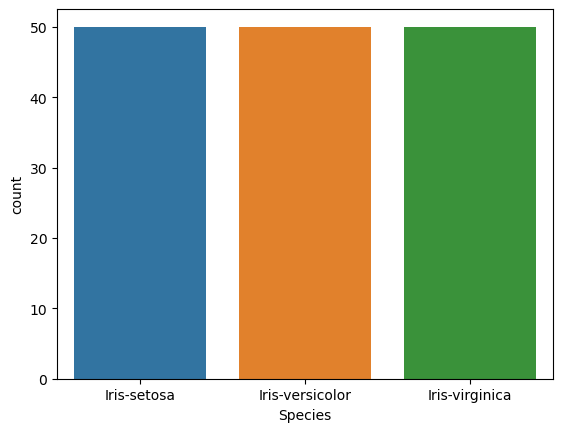

In [36]:
sns.countplot(x='Species',data=df,)

In [37]:
plt.show()

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

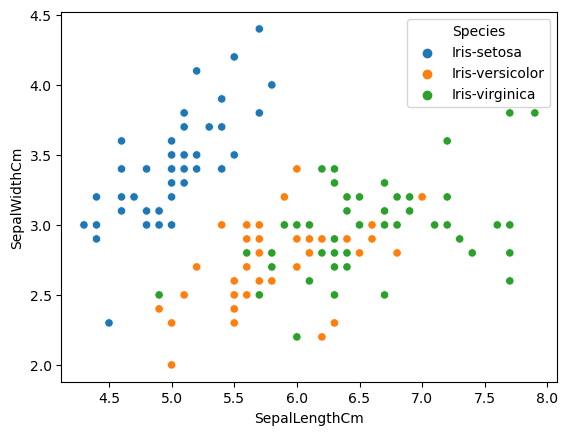

In [38]:

sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df,)

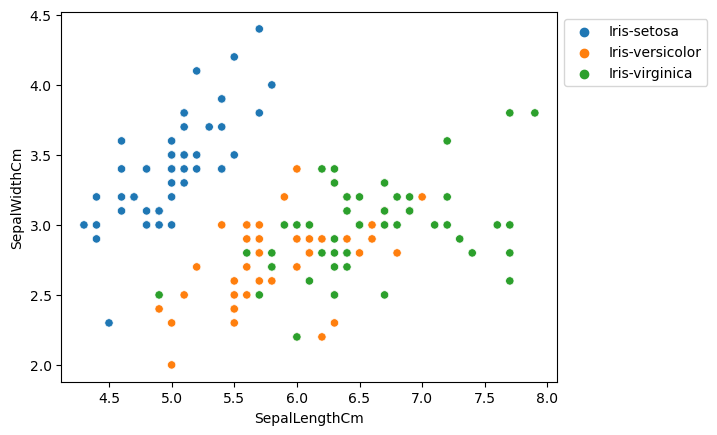

In [39]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df,)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

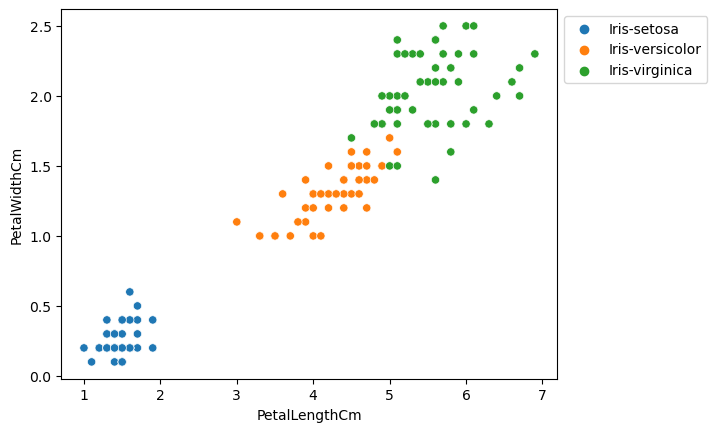

In [40]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=df,)
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

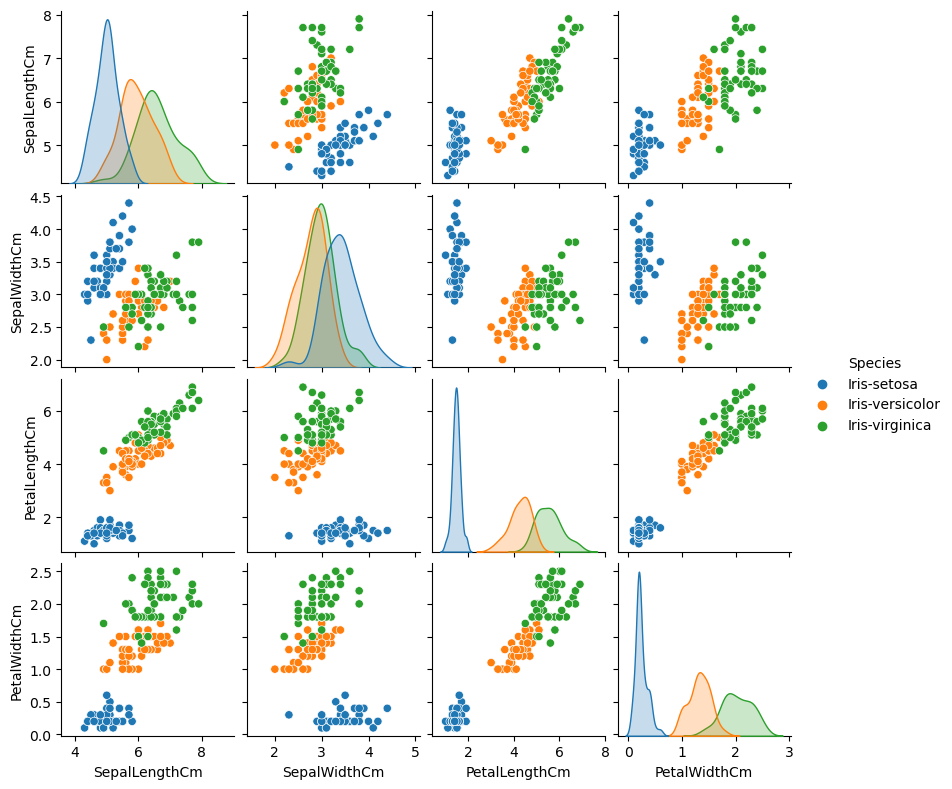

In [41]:
sns.pairplot(df.drop(['Id'],axis=1),hue='Species',height=2)

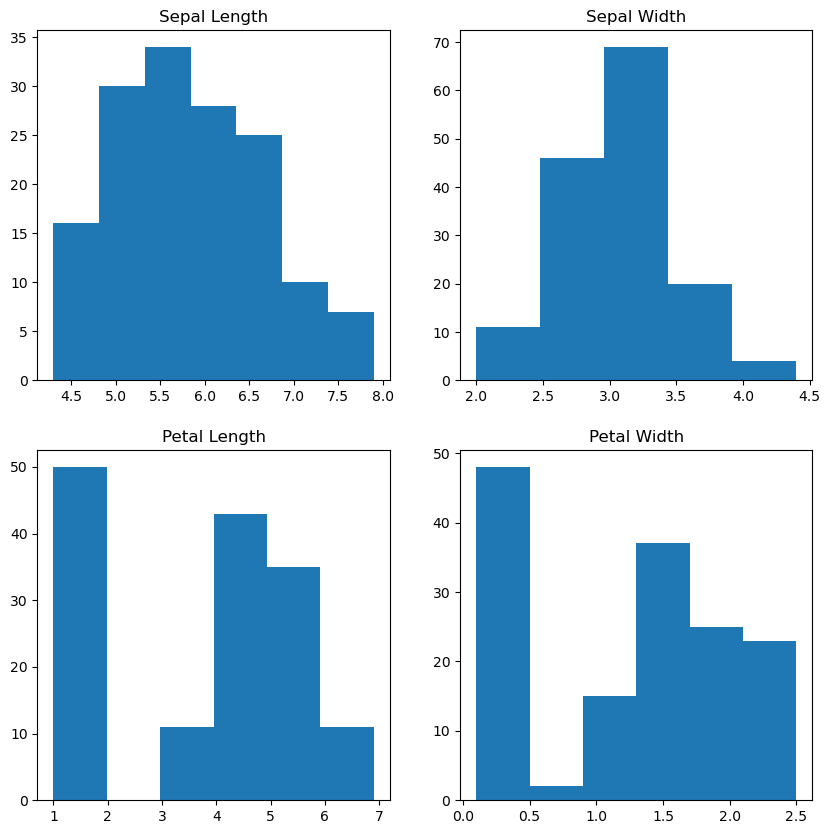

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(10,10)) 

  

axes[0,0].set_title("Sepal Length") 

axes[0,0].hist(df['SepalLengthCm'], bins=7) 

  

axes[0,1].set_title("Sepal Width") 

axes[0,1].hist(df['SepalWidthCm'], bins=5); 

  

axes[1,0].set_title("Petal Length") 

axes[1,0].hist(df['PetalLengthCm'], bins=6); 

  

axes[1,1].set_title("Petal Width") 

axes[1,1].hist(df['PetalWidthCm'], bins=6);

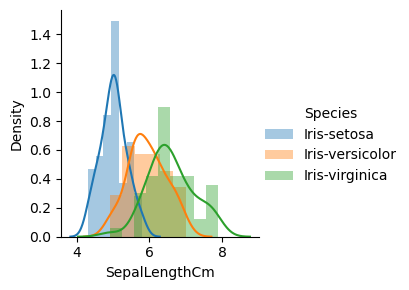

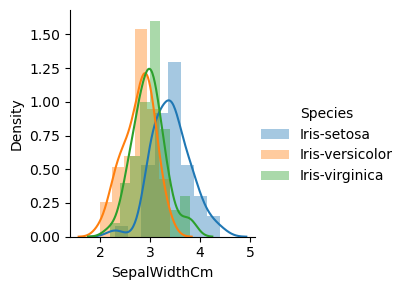

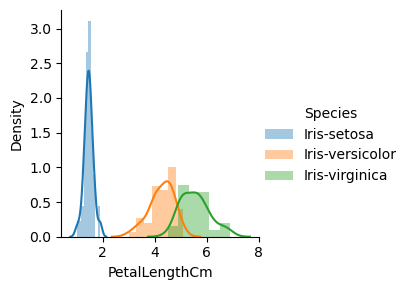

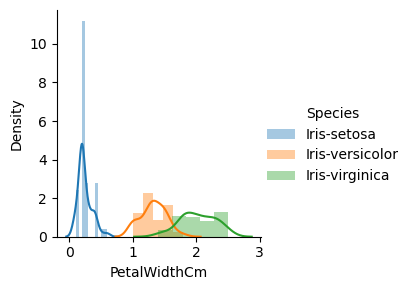

In [43]:
plot = sns.FacetGrid(df, hue="Species") 

plot.map(sns.distplot, "SepalLengthCm").add_legend() 

  

plot = sns.FacetGrid(df, hue="Species") 

plot.map(sns.distplot, "SepalWidthCm").add_legend() 

  

plot = sns.FacetGrid(df, hue="Species") 

plot.map(sns.distplot, "PetalLengthCm").add_legend() 

  

plot = sns.FacetGrid(df, hue="Species") 

plot.map(sns.distplot, "PetalWidthCm").add_legend() 

  
plt.show()

In [45]:
def graph(y): 

    sns.boxplot(x="Species", y=y, data=df) 

  

plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Axes: xlabel='SepalWidthCm'>

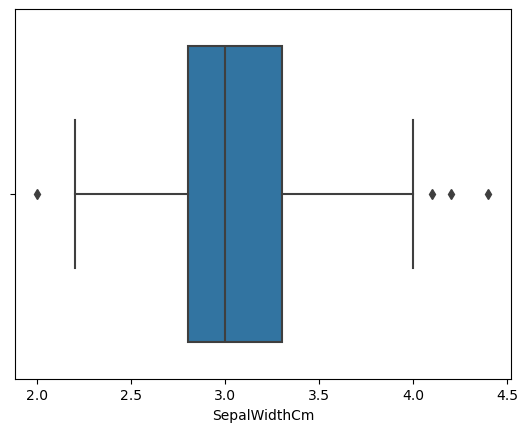

In [46]:
df = pd.read_csv('Iris.csv') 

  

sns.boxplot(x='SepalWidthCm', data=df)

Old Shape:  (150, 6)
New Shape:  (146, 6)


<Axes: xlabel='SepalWidthCm'>

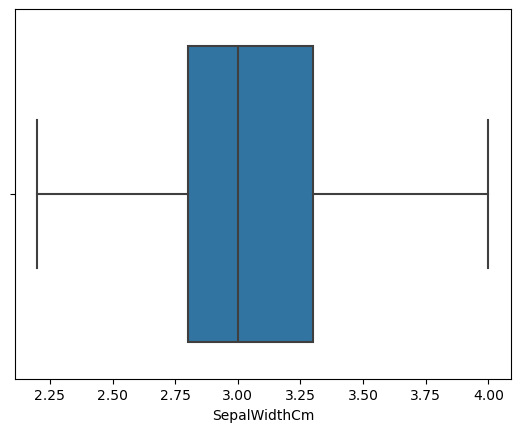

In [48]:
import  sklearn.datasets as sklearn 
import pandas as pd 

import seaborn as sns 

  
# Load the dataset 

df = pd.read_csv('Iris.csv') 

  
# IQR 

Q1 = np.percentile(df['SepalWidthCm'], 25, 

                interpolation = 'midpoint') 

  

Q3 = np.percentile(df['SepalWidthCm'], 75, 

                interpolation = 'midpoint') 

IQR = Q3 - Q1 

  

print("Old Shape: ", df.shape) 

  
# Upper bound 

upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR)) 

  
# Lower bound 

lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR)) 

  
# Removing the Outliers 

df.drop(upper[0], inplace = True) 

df.drop(lower[0], inplace = True) 

  

print("New Shape: ", df.shape) 

  

sns.boxplot(x='SepalWidthCm', data=df)

In [47]:
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['Species']= label_encoder.fit_transform(data['Species']) 
  
data['Species'].unique()

array([0, 1, 2])

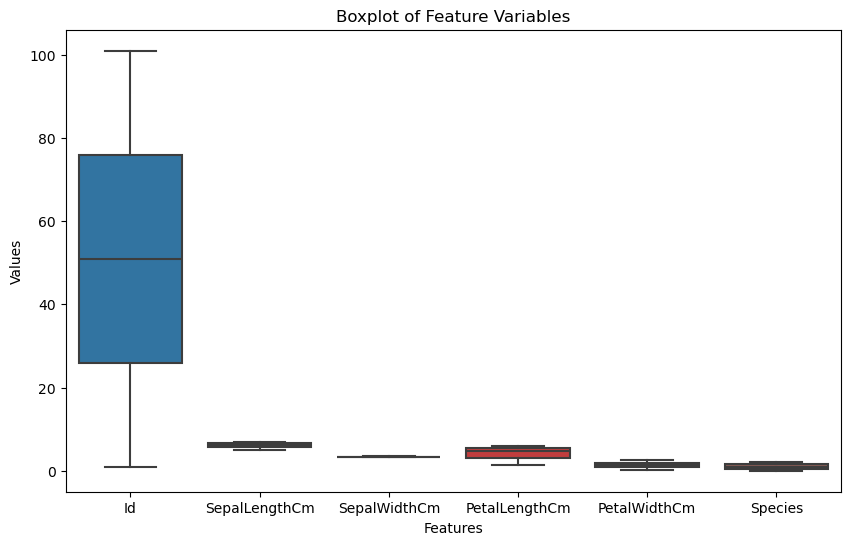

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data)
plt.title('Boxplot of Feature Variables')
plt.xlabel('Features')
plt.ylabel('Values')
#plt.xticks(rotation=45)
plt.show()

In [50]:
df=data
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[(z_scores < threshold).all(axis=1)]

# Remove outliers from X
data_no_outliers = remove_outliers_zscore(data)

# Print the shape before and after removing outliers
print("Shape of data before removing outliers:", data)
print("Shape of data after removing outliers:", data_no_outliers.shape)

Shape of data before removing outliers:       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
50    51            7.0           3.2            4.7           1.4        1
100  101            6.3           3.3            6.0           2.5        2
Shape of data after removing outliers: (3, 6)


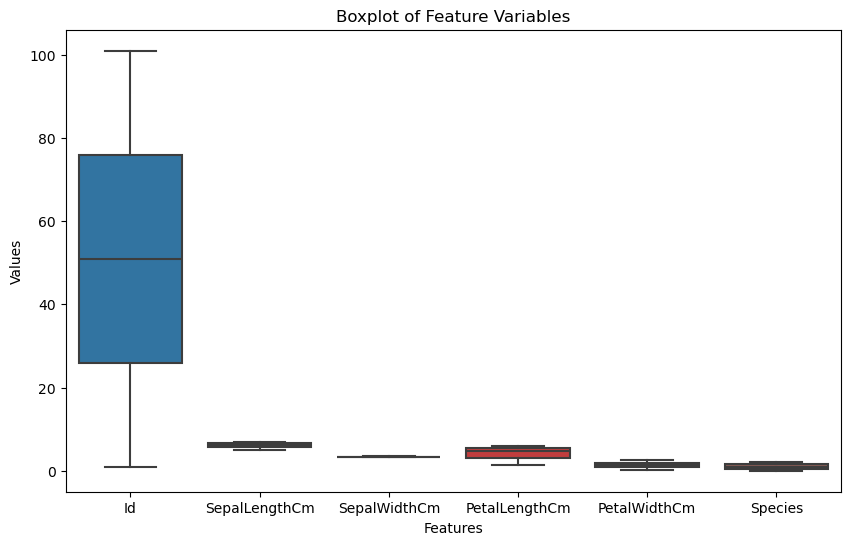

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data_no_outliers)
plt.title('Boxplot of Feature Variables')
plt.xlabel('Features')
plt.ylabel('Values')
#plt.xticks(rotation=45)
plt.show()

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = data_no_outliers.drop('Species', axis=1)
y = data_no_outliers['Species']

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)
print(X_train.shape)
print(X_test.shape)

(2, 5)
(1, 5)


In [56]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3,random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [57]:
print("Train Score : ", model.score(X_train,y_train))
print("Test Score : ", model.score(X_test,y_test))

Train Score :  1.0
Test Score :  0.0


In [58]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Accuracy
print("Training Accuracy:", accuracy_score(y_train, train_preds))
print("Testing Accuracy:", accuracy_score(y_test, test_preds))

Training Accuracy: 1.0
Testing Accuracy: 0.0


In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classification Report
print("Classification Report for Testing Data:")
print(classification_report(y_test, test_preds))

Classification Report for Testing Data:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



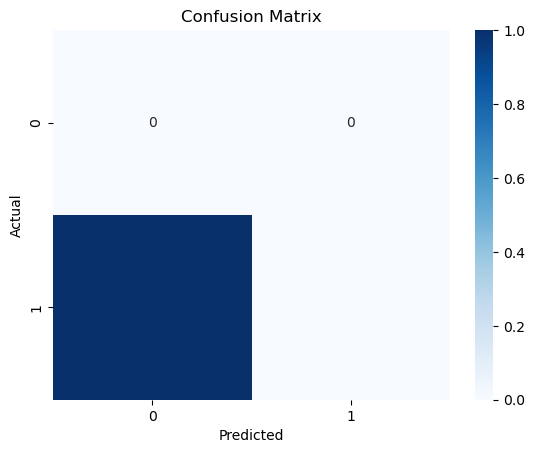

In [61]:
sns.heatmap(confusion_matrix(y_test, test_preds), annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

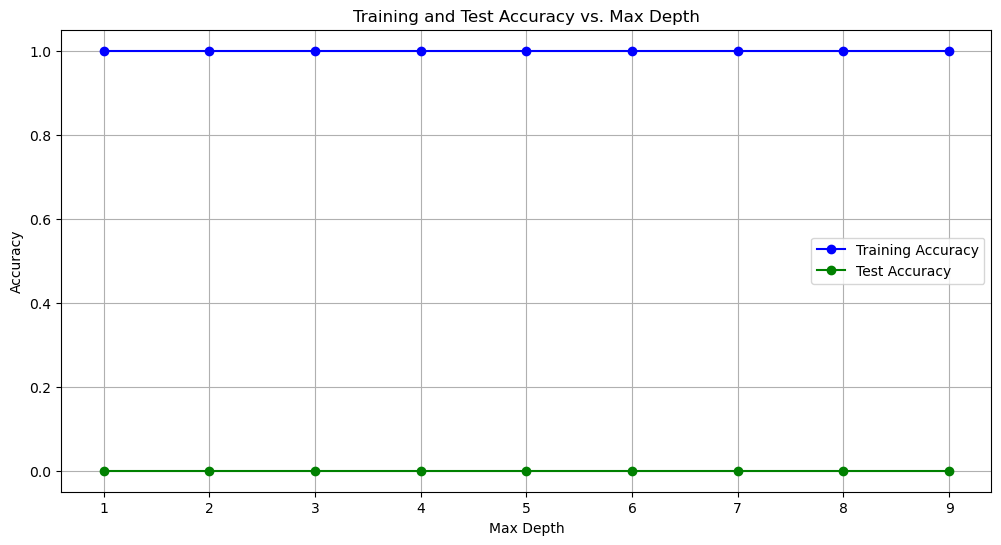

In [62]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize lists to store accuracy values
train_accuracy = []
test_accuracy = []

# Iterate through different max_depth values
max_depth_range = range(1, 10)
for i in max_depth_range:
    # Create and train the model
    model = DecisionTreeClassifier(max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    
    # Calculate training accuracy
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracy.append(train_acc)
    
    # Calculate test accuracy
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracy.append(test_acc)

# Plot the training and test accuracy
plt.figure(figsize=(12, 6))
plt.plot(max_depth_range, train_accuracy, label='Training Accuracy', marker='o', linestyle='-', color='blue')
plt.plot(max_depth_range, test_accuracy, label='Test Accuracy', marker='o', linestyle='-', color='green')
plt.title('Training and Test Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
data.sample(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,2
50,51,7.0,3.2,4.7,1.4,1
0,1,5.1,3.5,1.4,0.2,0


In [64]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [65]:
df.groupby(["Species"], as_index=False)["PetalLengthCm"].mean()

,Species,PetalLengthCm
0,0,1.4
1,1,4.7
2,2,6.0


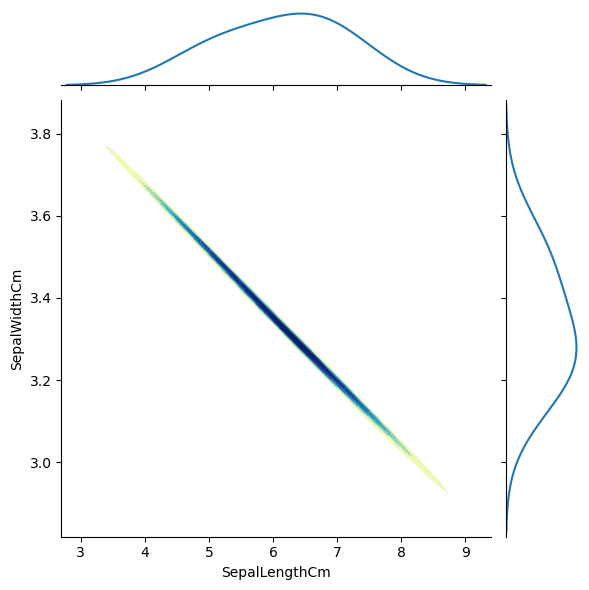

In [66]:
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=df, kind='kde', shade=True, cmap='YlGnBu')

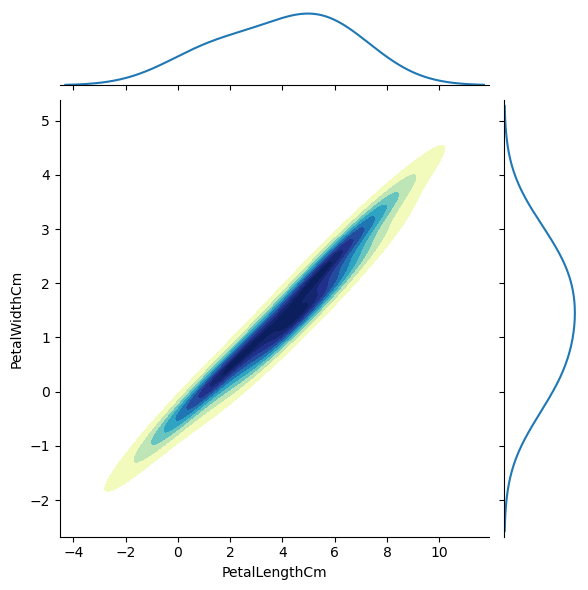

In [67]:
sns.jointplot(x='PetalLengthCm', y='PetalWidthCm', data=df, kind='kde', shade=True, cmap='YlGnBu')

<Axes: >

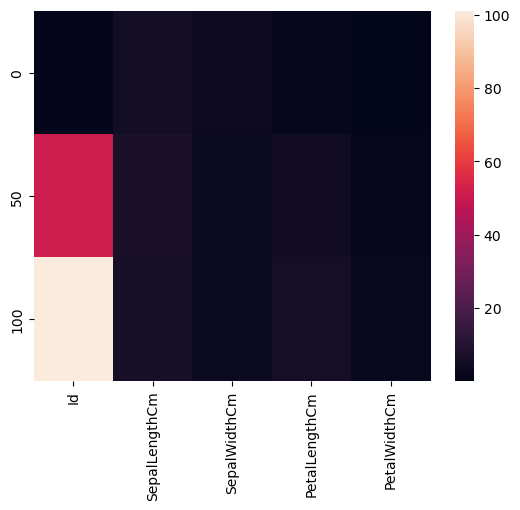

In [68]:
sns.heatmap(df.drop('Species', axis=1))

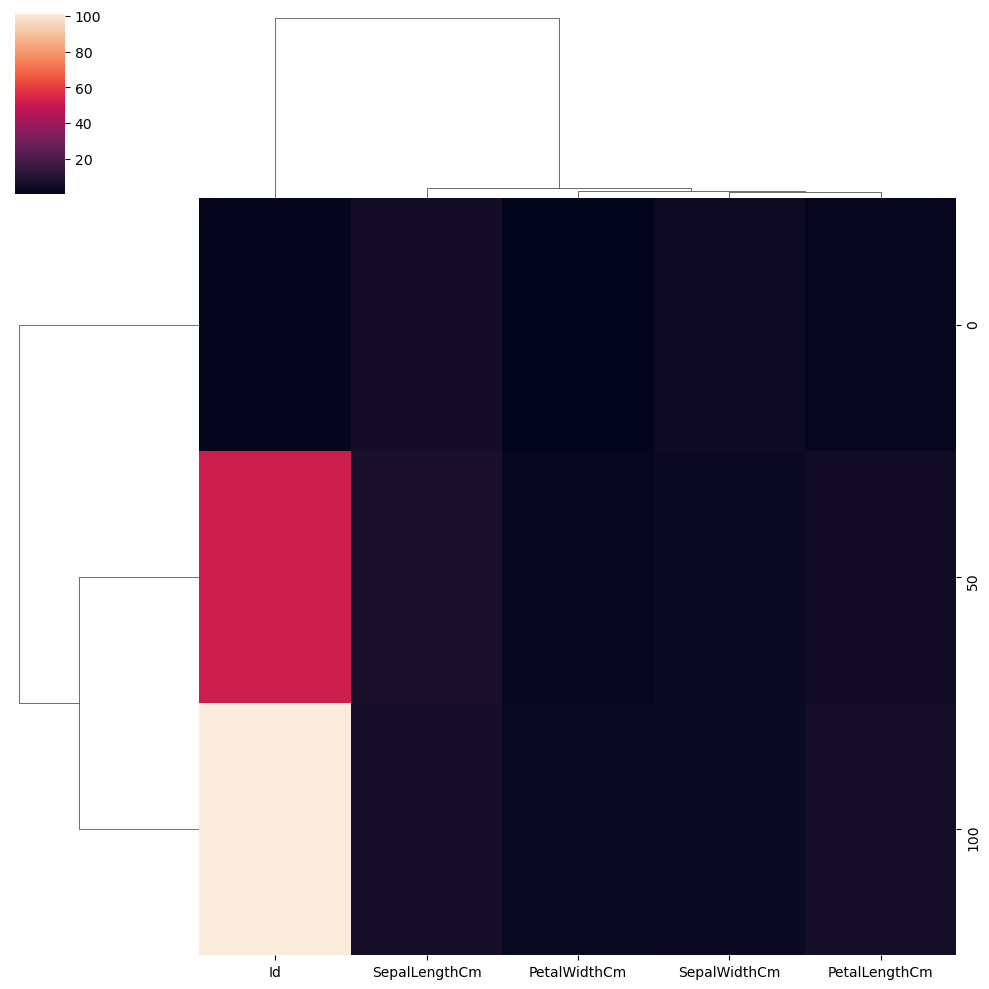

In [69]:
sns.clustermap(df.drop('Species', axis=1))

<Axes: xlabel='SepalLengthCm', ylabel='Density'>

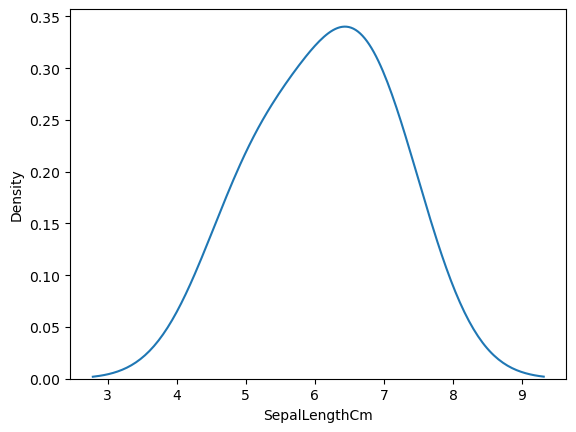

In [70]:
sns.kdeplot(df['SepalLengthCm'])

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

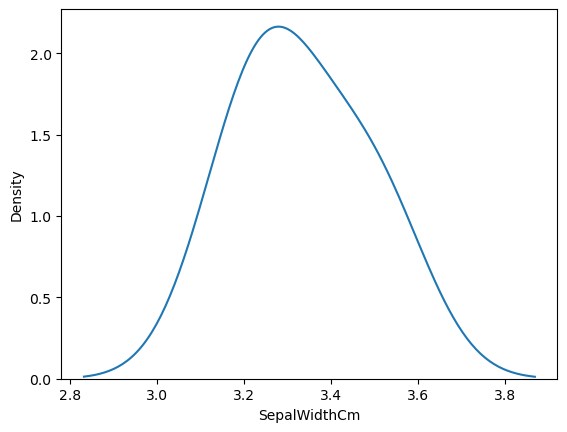

In [71]:
sns.kdeplot(df['SepalWidthCm'])

<Axes: xlabel='PetalLengthCm', ylabel='Density'>

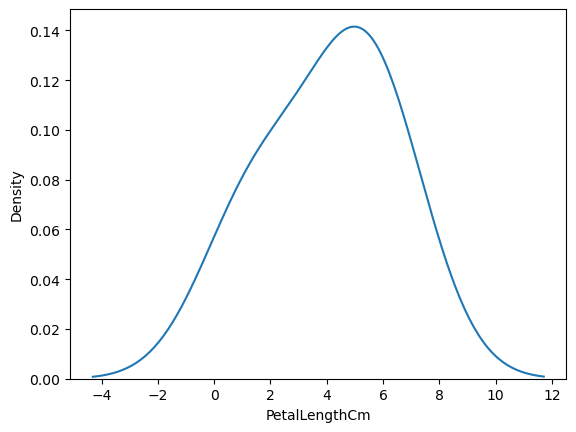

In [72]:
sns.kdeplot(df['PetalLengthCm'])

<Axes: xlabel='PetalWidthCm', ylabel='Density'>

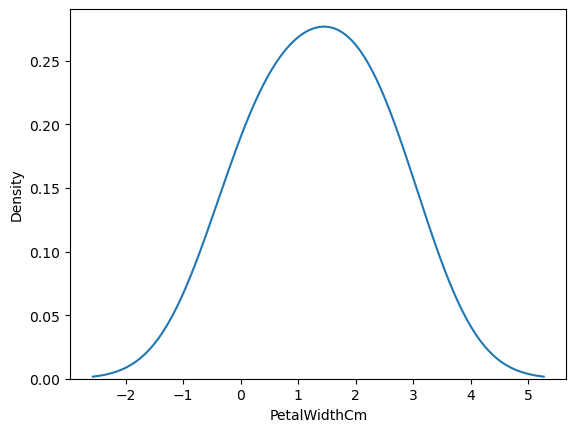

In [73]:
sns.kdeplot(df['PetalWidthCm'])

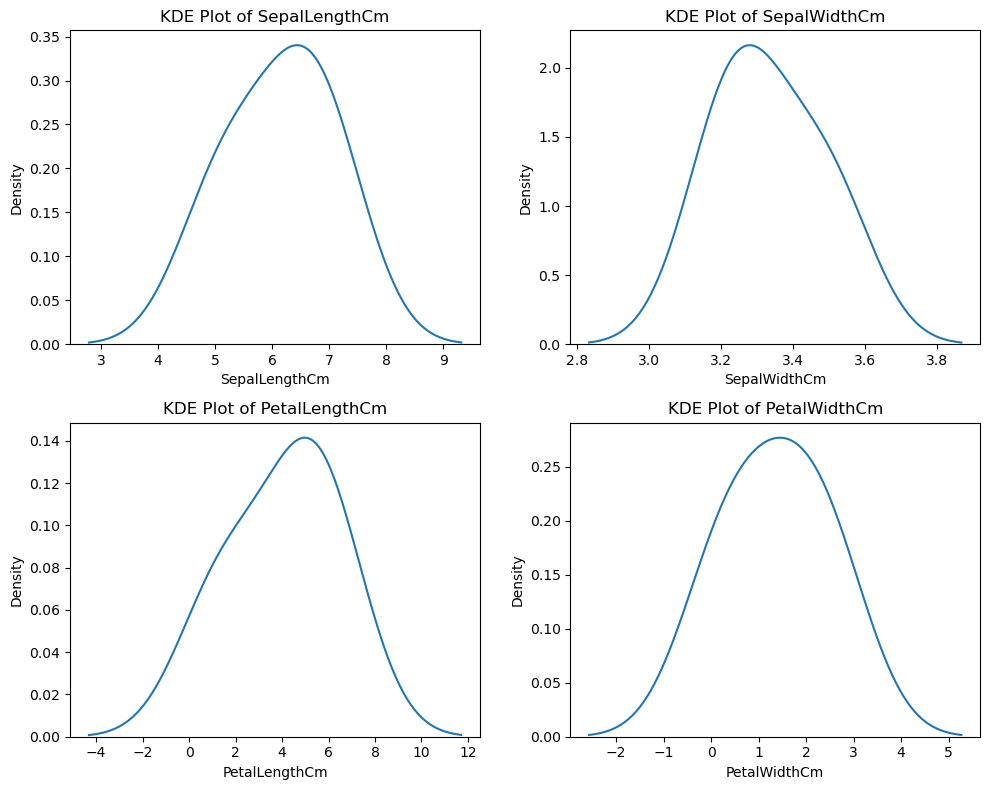

In [74]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# List of column names for the KDE plots
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Plot KDE plots for each column in its corresponding subplot
for i, column in enumerate(columns):
    sns.kdeplot(df[column], ax=axes[i])
    axes[i].set_title(f'KDE Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [75]:
df1=df.copy()

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
label_encoder=LabelEncoder()

In [78]:
df1['coded_Species']=label_encoder.fit_transform(df1['Species'])

In [79]:
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,coded_Species
0,1,5.1,3.5,1.4,0.2,0,0
50,51,7.0,3.2,4.7,1.4,1,1
100,101,6.3,3.3,6.0,2.5,2,2


In [80]:
df1.drop(['Species'],axis=1,inplace=True)

In [81]:
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,coded_Species
0,1,5.1,3.5,1.4,0.2,0
50,51,7.0,3.2,4.7,1.4,1
100,101,6.3,3.3,6.0,2.5,2


In [82]:
df1['coded_Species'].value_counts()

coded_Species
0    1
1    1
2    1
Name: count, dtype: int64

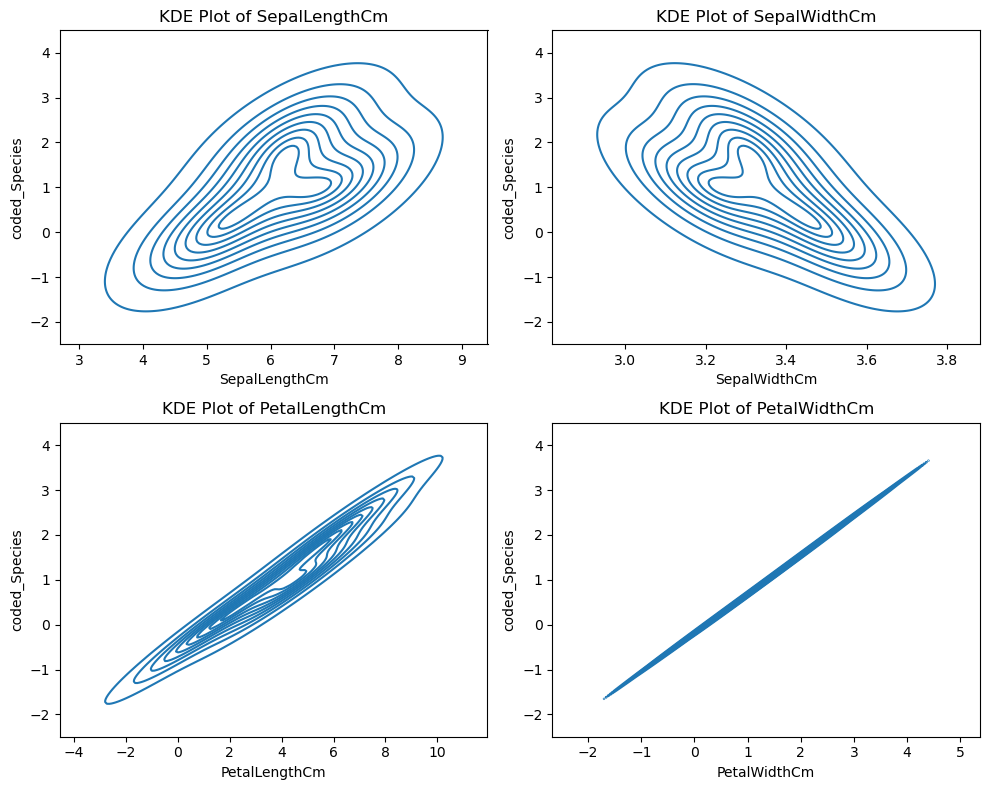

In [83]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# List of column names for the KDE plots
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Plot KDE plots for each column in its corresponding subplot
for i, column in enumerate(columns):
    # Change the y argument to a numeric variable, such as 'SepalLengthCm'
    sns.kdeplot(data=df1, x=df1[column], y=df1['coded_Species'], ax=axes[i])
    axes[i].set_title(f'KDE Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('coded_Species')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

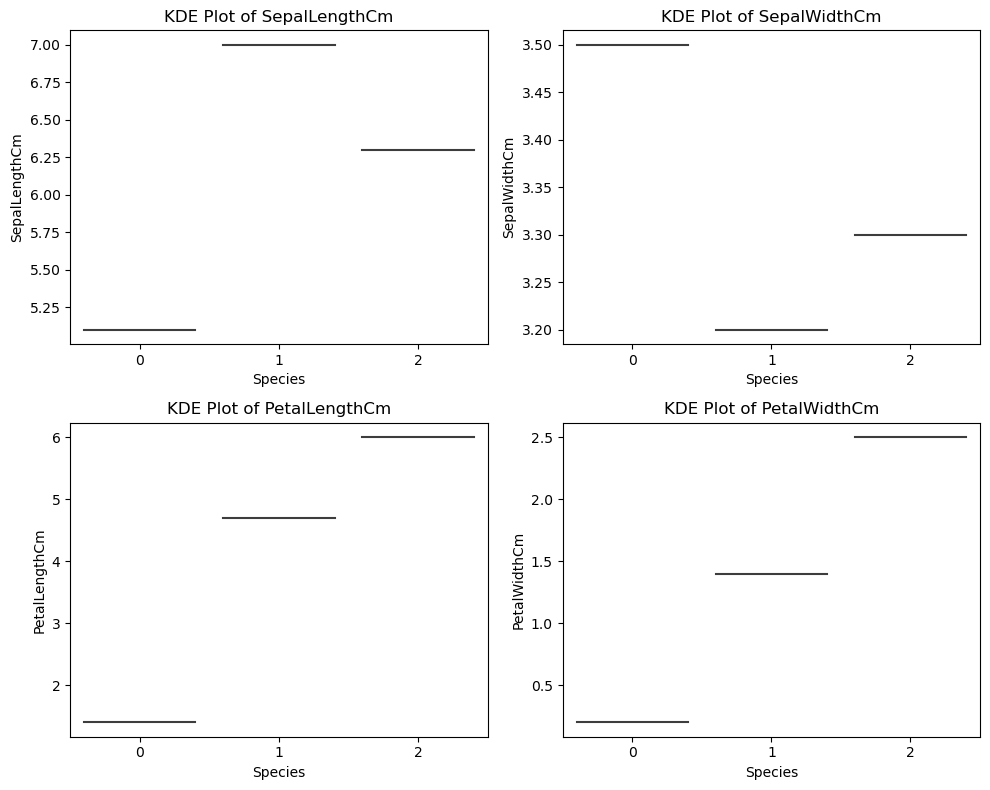

In [84]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# List of column names for the KDE plots
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Plot KDE plots for each column in its corresponding subplot
for i, column in enumerate(columns):
    # Change the y argument to a numeric variable, such as 'SepalLengthCm'
    sns.violinplot(data=df, x=df['Species'], y=df[column], ax=axes[i])
    axes[i].set_title(f'KDE Plot of {column}')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

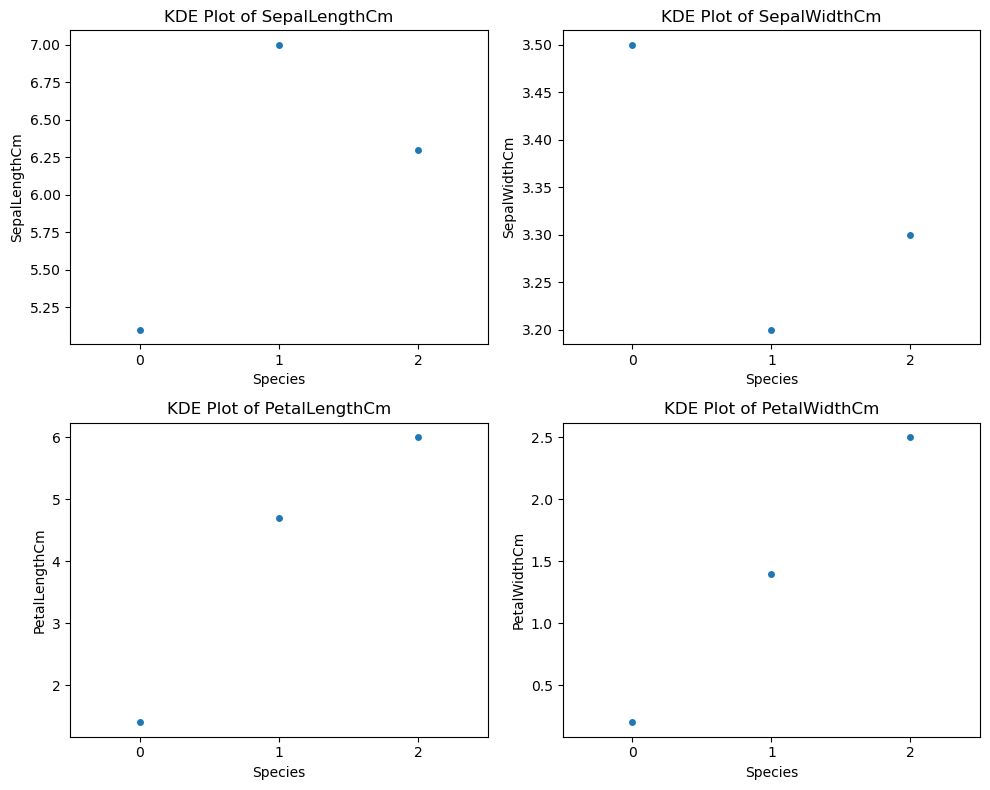

In [85]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# List of column names for the KDE plots
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Plot KDE plots for each column in its corresponding subplot
for i, column in enumerate(columns):
    # Change the y argument to a numeric variable, such as 'SepalLengthCm'
    sns.swarmplot(data=df, x=df['Species'], y=df[column], ax=axes[i])
    axes[i].set_title(f'KDE Plot of {column}')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [86]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score


from sklearn.linear_model import LogisticRegression

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

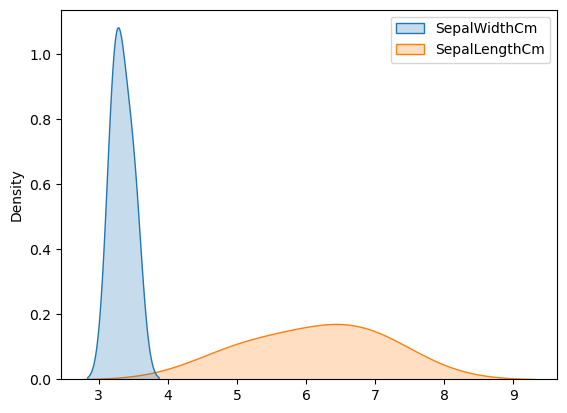

In [88]:
sns.kdeplot(df[['SepalWidthCm', 'SepalLengthCm']] , fill=True)
plt.show()

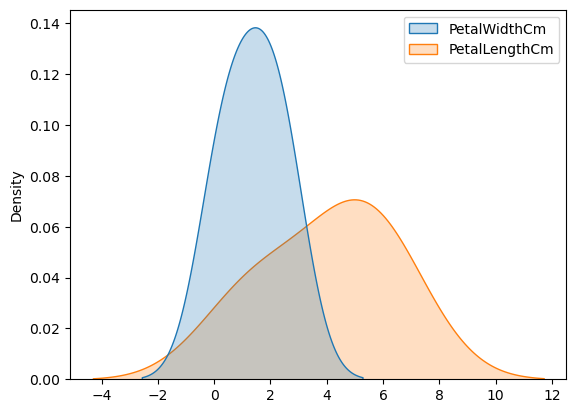

In [89]:
sns.kdeplot(df[['PetalWidthCm', 'PetalLengthCm']], fill=True)
plt.show()

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
lg = LogisticRegression()

#Fit the model
clf = lg.fit(X_train, y_train)

In [92]:
y_pred = clf.predict(X_test)

In [93]:
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Accuracy Score :  0.0


In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



In [95]:
des_stat=pd.DataFrame() # an empty dataframe
# Measure of central tendency
des_stat['Mean']=df.mean() # for mean of all columns
des_stat['Median']=df.median() # for median of all columns
des_stat['mode']=df.mode().iloc[0]
# measure of dispersion
# Range,STD,Varance,IQR,Skewness,Kurtosis,25%
des_stat['Range']=[np.ptp(df[i]) for i in df.columns]
des_stat['Stdev']=df.std()
des_stat['Variance']=df.var()
des_stat['Skewness']=df.skew()
des_stat['Kurtosis']=df.kurt()
des_stat['25%']=df.quantile(q=0.25,axis=0)
des_stat['50%']=df.quantile(q=0.50,axis=0)
des_stat['75%']=df.quantile(q=0.75,axis=0)
round(des_stat.T,2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Mean,51.0,6.13,3.33,4.03,1.37,1.0
Median,51.0,6.30,3.30,4.70,1.40,1.0
mode,1.0,5.10,3.20,1.40,0.20,0.0
Range,100.0,1.90,0.30,4.60,2.30,2.0
Stdev,50.0,0.96,0.15,2.37,1.15,1.0
Variance,2500.0,0.92,0.02,5.62,1.32,1.0
Skewness,0.0,-0.76,0.94,-1.17,-0.13,0.0
Kurtosis,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.0,5.70,3.25,3.05,0.80,0.5
50%,51.0,6.30,3.30,4.70,1.40,1.0


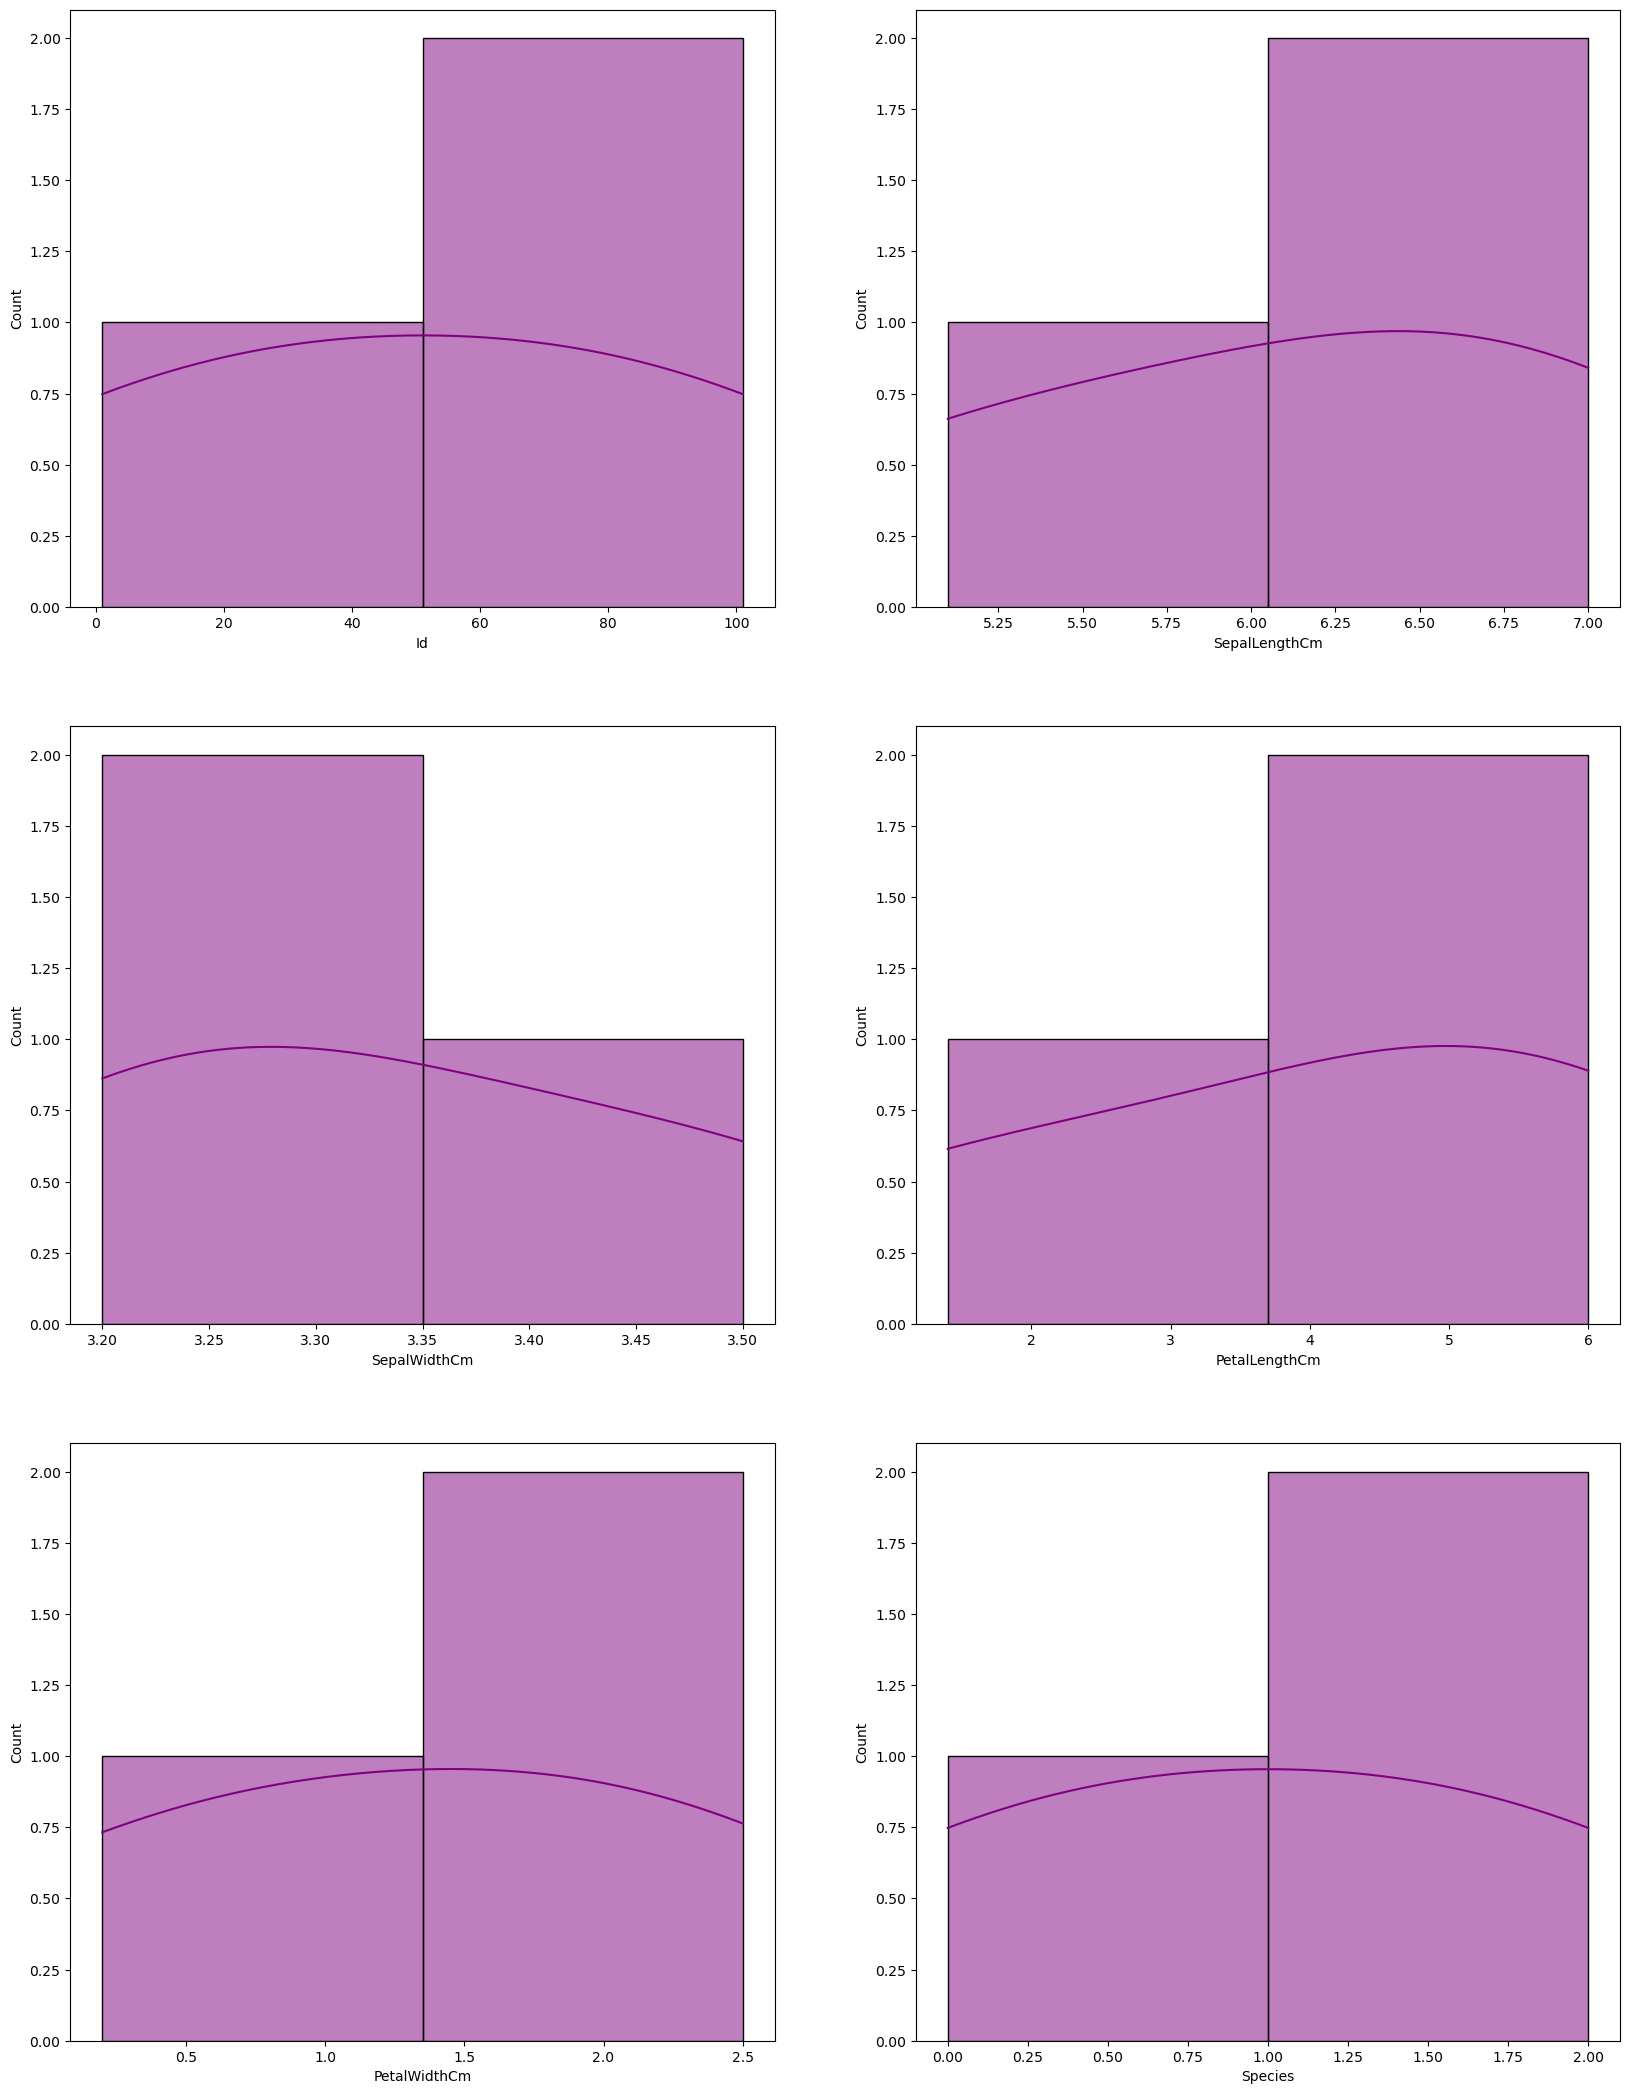

In [96]:
plt.figure(figsize = (20, 45))
for i, col in enumerate(df.columns):
    plt.subplot(5, 2, i+1)
    sns.histplot(data = df, x = col, kde = True, bins = round(np.sqrt(len(df))), color = 'purple')
plt.show()

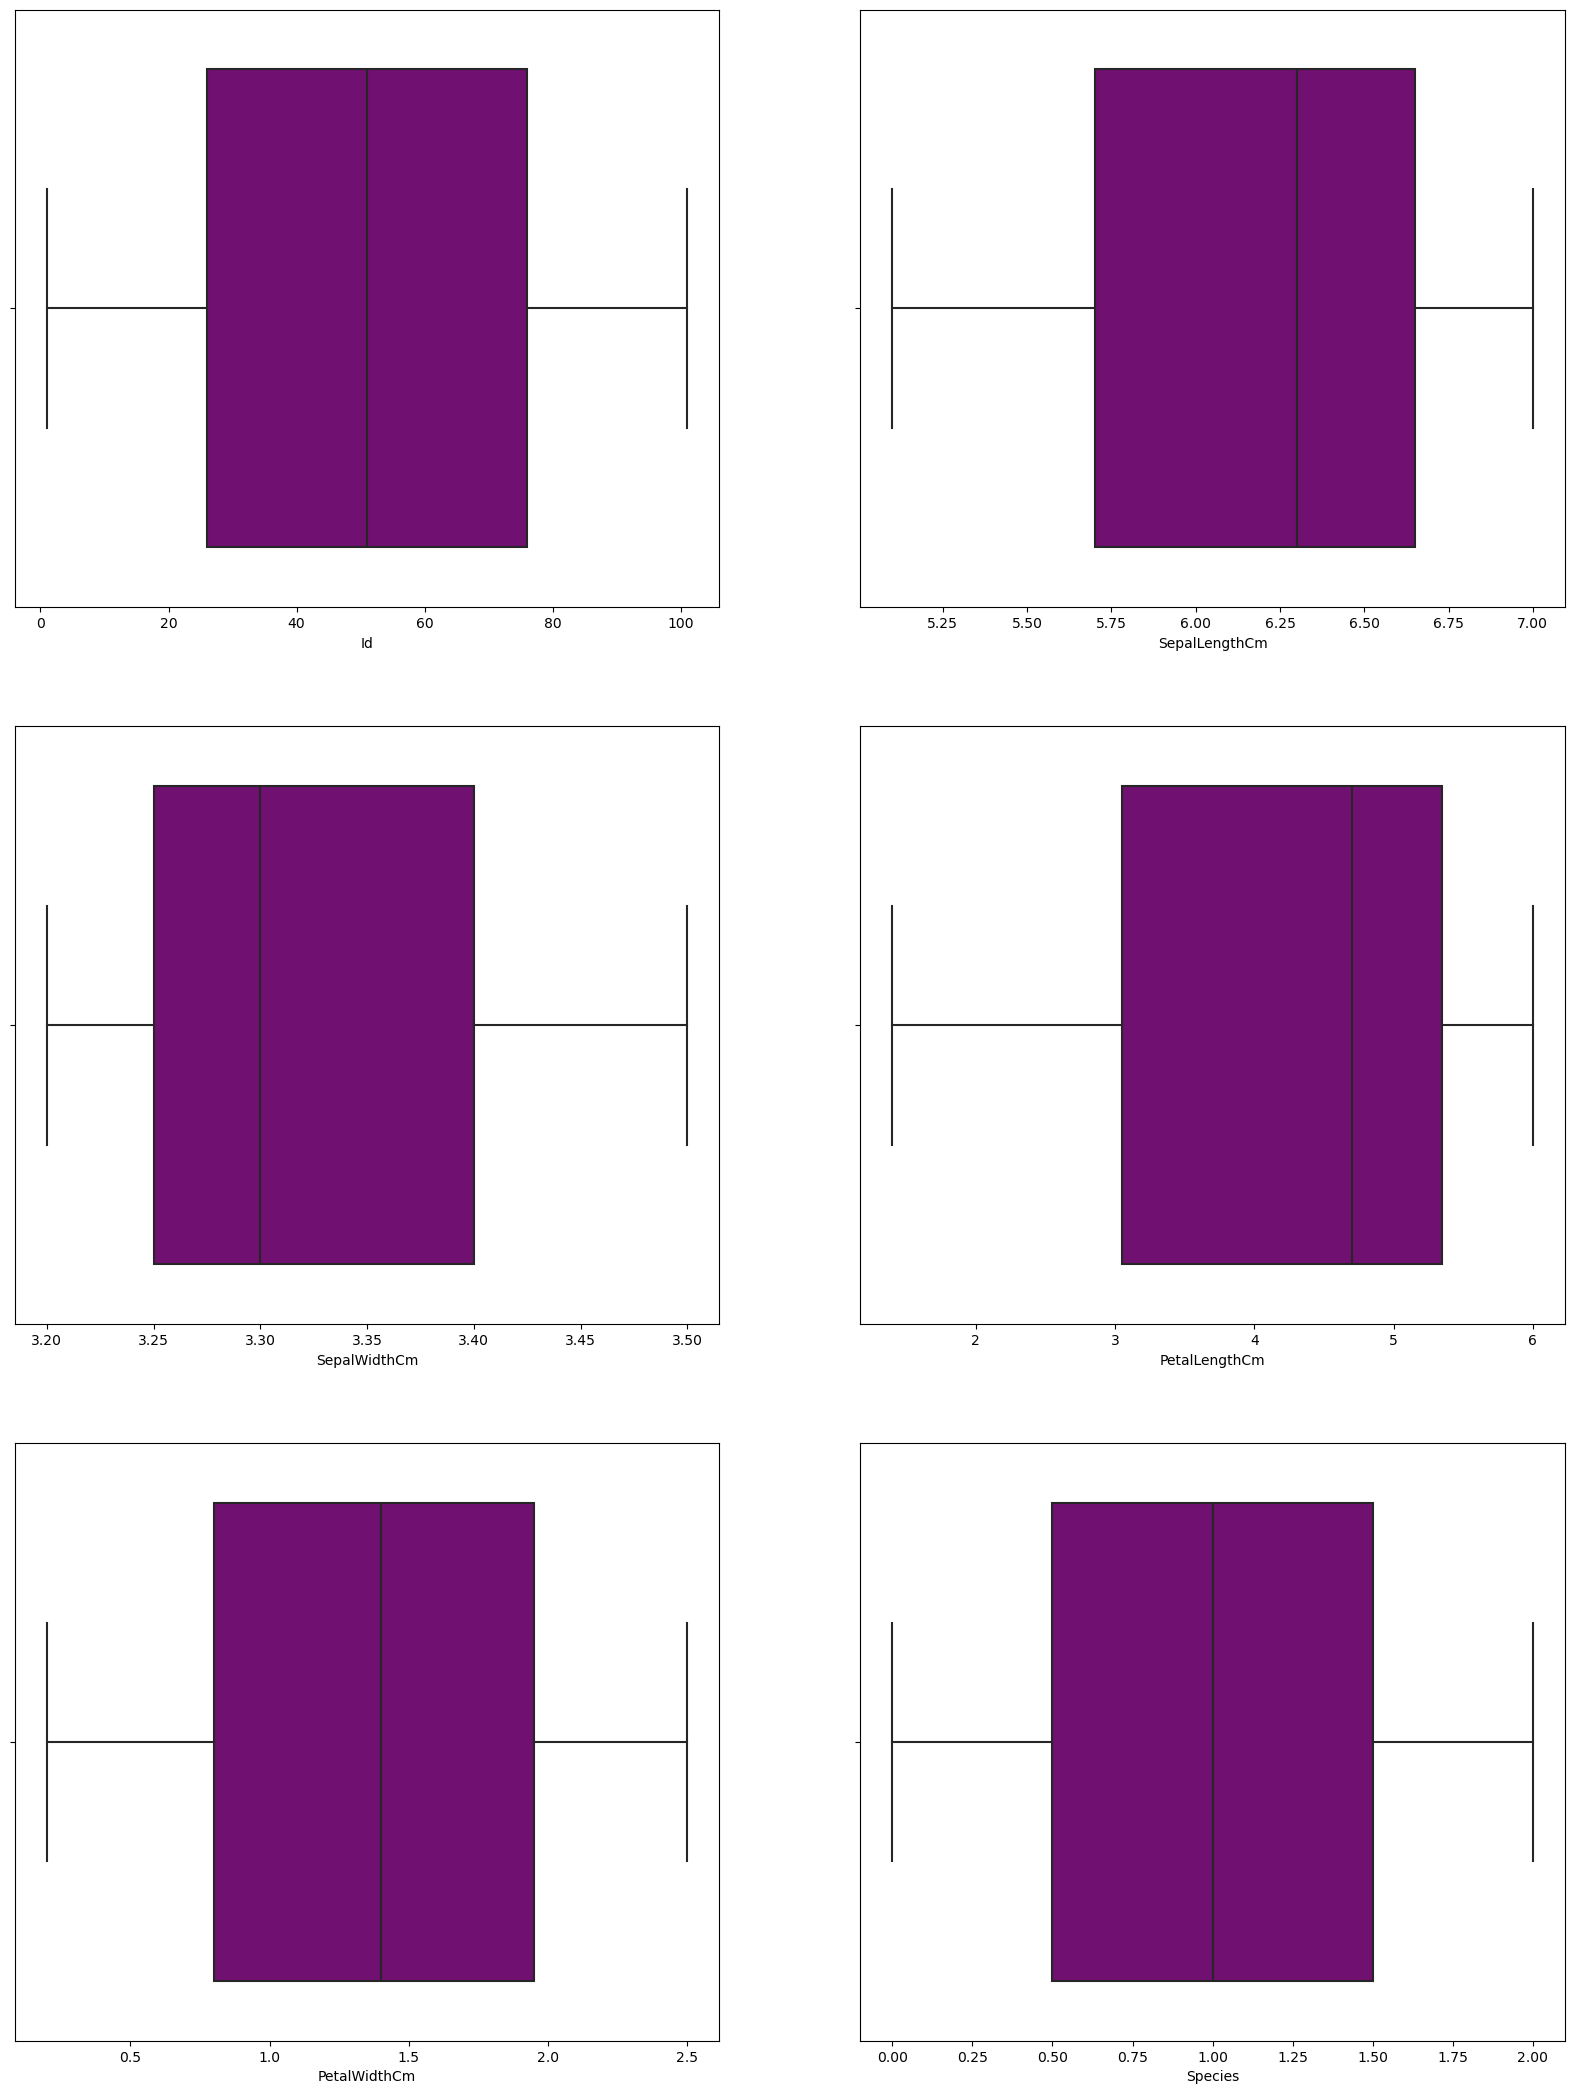

In [97]:
plt.figure(figsize = (20, 45))
for i, col in enumerate(df.columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data = df, x = col, color = 'purple')
plt.show()

In [98]:
from scipy.stats.mstats import winsorize
winsored_df=df.apply(lambda X: winsorize(X,limits=0.05))
winsored_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
50,51,7.0,3.2,4.7,1.4,1
100,101,6.3,3.3,6.0,2.5,2


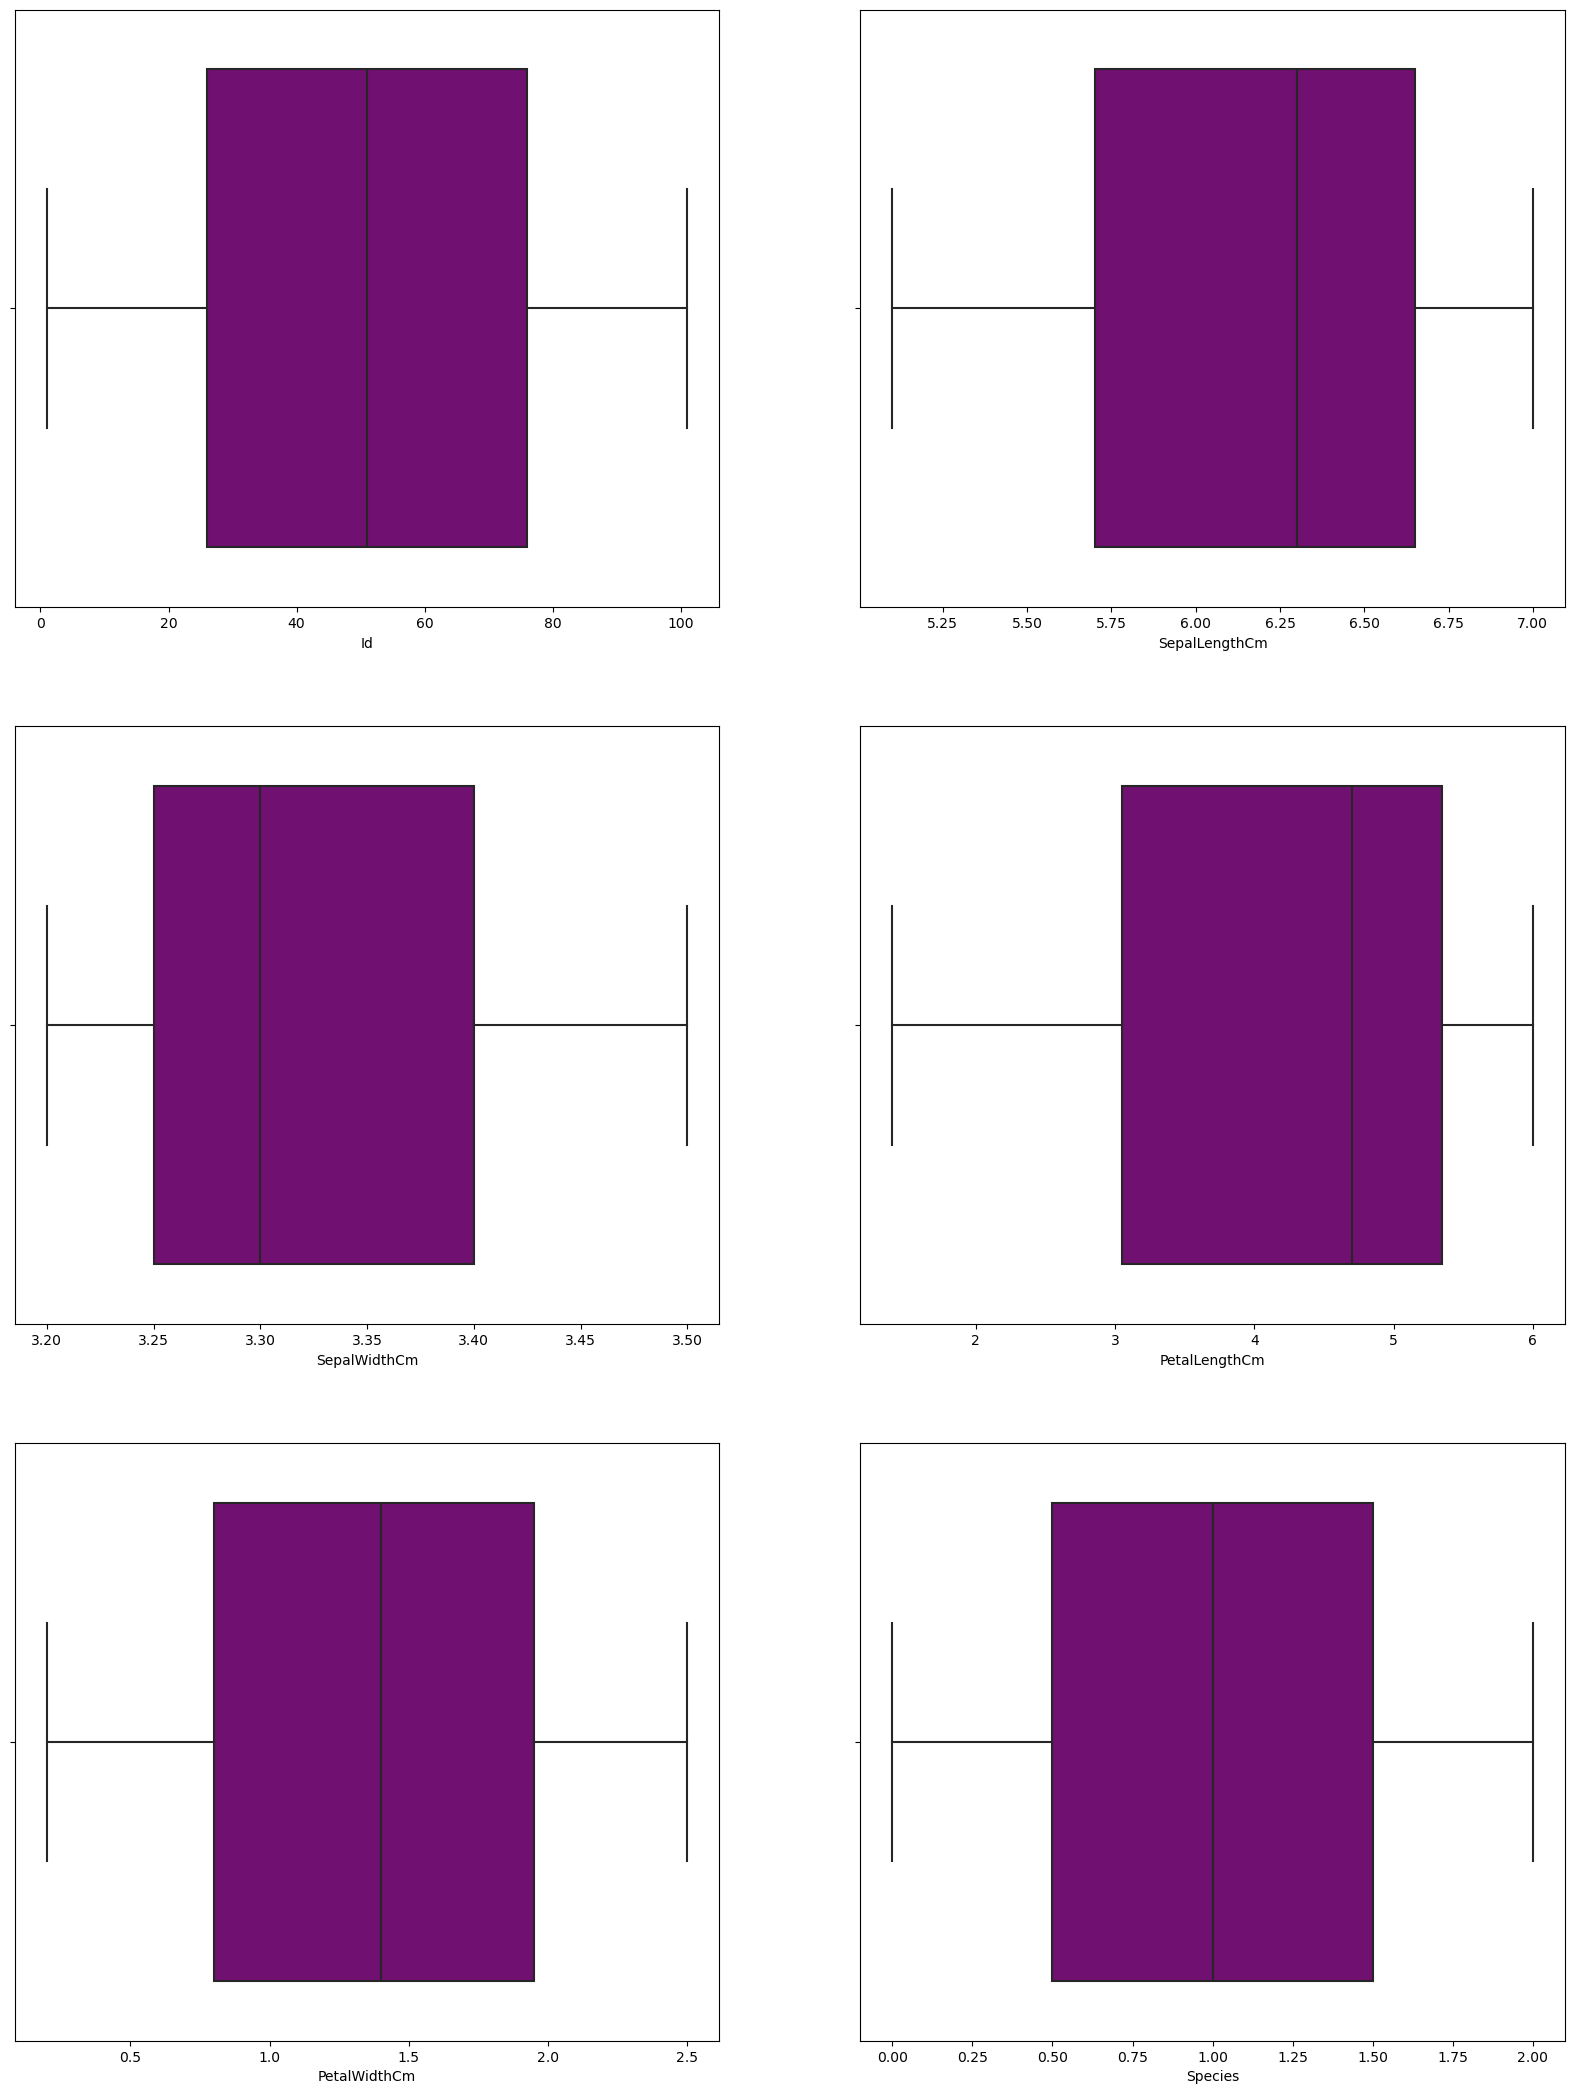

In [99]:
plt.figure(figsize = (20, 45))
for i, col in enumerate(df.columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data = winsored_df, x = col, color = 'purple')
plt.show()

In [100]:
from scipy import stats
from scipy.stats import zscore
pearson_coef_val = []
p_val = []

for col in winsored_df.columns:
    pearson_coef_val, p_value = stats.pearsonr(winsored_df[col], winsored_df['Species'])
    p_val.append(round(p_value, 4))

In [101]:
p_val

[0.0, 0.5707, 0.5456, 0.1566, 0.016, 0.0]

In [102]:
is_significant=[]
for i in p_val:
    if i>0.1:
        is_significant.append('NO')
    else:
        is_significant.append('Yes')
is_significant

['Yes', 'NO', 'NO', 'NO', 'Yes', 'Yes']

In [103]:
data = {
    'Feature': winsored_df.columns,
    'Correlation Coefficient': pearson_coef_val,
    'is_significant': is_significant
}

df_sig = pd.DataFrame(data)
df_sig

,Feature,Correlation Coefficient,is_significant
0,Id,1.0,Yes
1,SepalLengthCm,1.0,NO
2,SepalWidthCm,1.0,NO
3,PetalLengthCm,1.0,NO
4,PetalWidthCm,1.0,Yes
5,Species,1.0,Yes


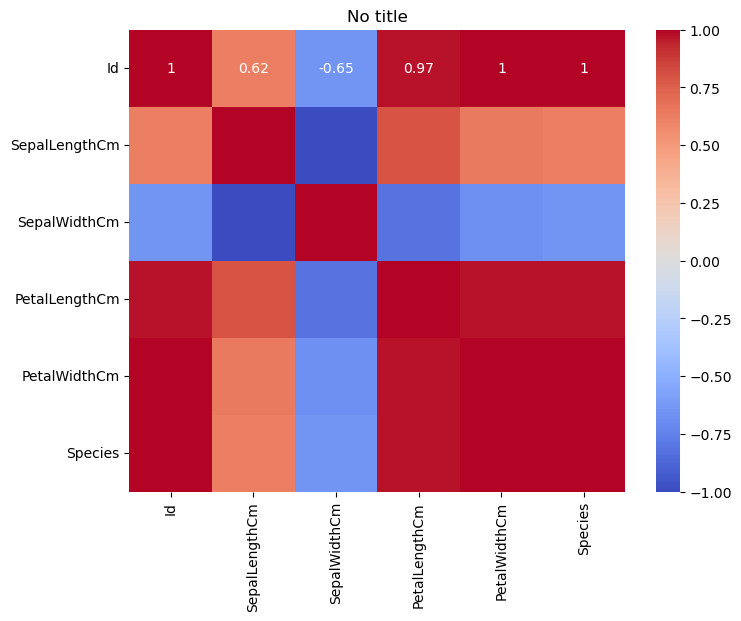

In [104]:
corr_matrix = winsored_df.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('No title')
plt.show()

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[-1.,  1., -1., -1., -1.],
       [ 1., -1.,  1.,  1.,  1.]])

In [106]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate
model = KNeighborsClassifier(n_neighbors =1)
# train the model
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [107]:
new_data = [[5.1, 3.5, 1.4, 0.2,0.2], [6.3, 2.9, 5.6, 1.8,0.2]]
new_data_scaled = scaler.transform(new_data)
predictions = model.predict(new_data)
print("Predictions:", predictions)

Predictions: [1 1]
